In [0]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
from google.colab import files
uploaded = files.upload()

Saving A.png to A.png
Saving B.png to B.png


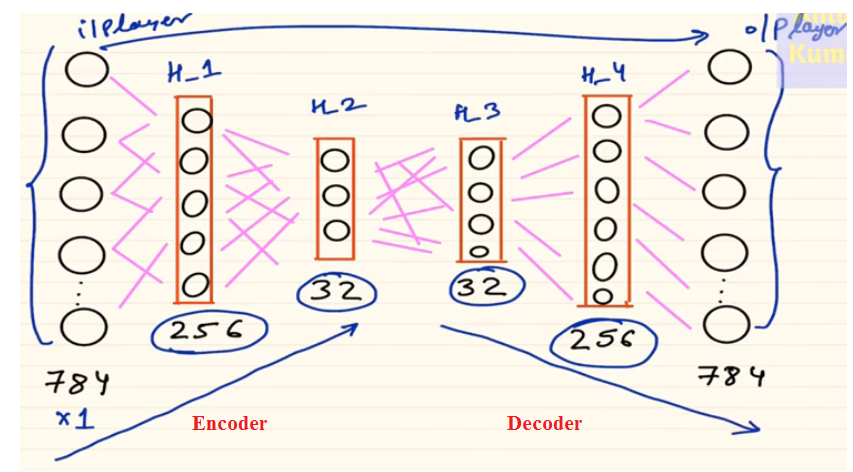

In [32]:
from  IPython.display  import Image
Image('B.png')

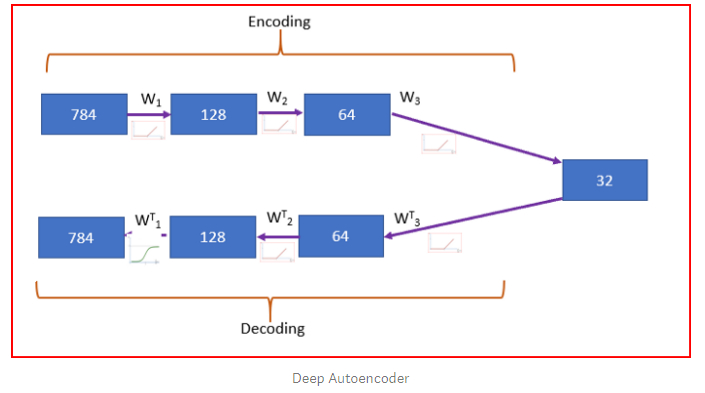

In [31]:
from  IPython.display  import Image
Image('A.png')

In [34]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [0]:
input_img= Input(shape=(784,))

In [0]:
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)

In [0]:
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

In [0]:
autoencoder=Model(input_img, decoded)

In [0]:
encoder = Model(input_img, encoded)

In [40]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_16 (Dense)             (None, 784)               101136    
Total para

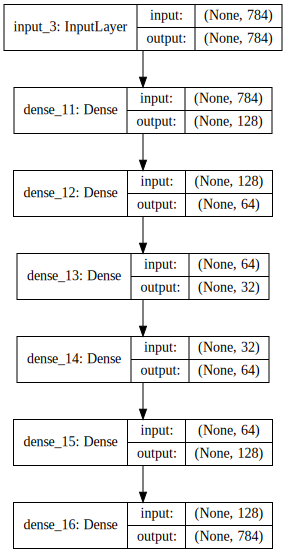

In [41]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

In [22]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

W0725 09:23:47.682628 140203965065088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0725 09:23:47.715900 140203965065088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0725 09:23:47.723677 140203965065088 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

W0725 09:25:06.184002 140203965065088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.2560 - acc: 0.7834 - val_loss: 0.1761 - val_acc: 0.7981
Epoch 2/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1590 - acc: 0.8030 - val_loss: 0.1464 - val_acc: 0.8034
Epoch 3/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1404 - acc: 0.8068 - val_loss: 0.1318 - val_acc: 0.8077
Epoch 4/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1281 - acc: 0.8091 - val_loss: 0.1229 - val_acc: 0.8090
Epoch 5/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1214 - acc: 0.8101 - val_loss: 0.1177 - val_acc: 0.8097
Epoch 6/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1169 - acc: 0.8108 - val_loss: 0.1136 - val_acc: 0.8102
Epoch 7/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1133 - acc: 0.8114 - val_loss: 0.1105 - val_acc

In [0]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

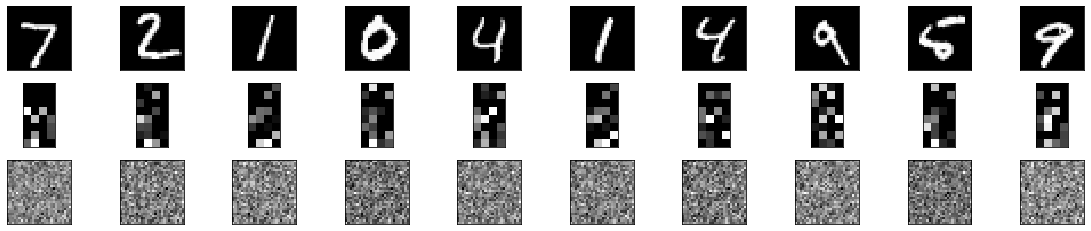

In [43]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()